<a href="https://colab.research.google.com/github/ryankoul/DS-Unit-2-Linear-Models/blob/master/DS-Unit-2-Kaggle-Challenge/Ryan_Koul_LS_DS15_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [X] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Begin with baselines for classification.
- [x] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [x] Get your validation accuracy score.
- [x] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.
- [ ] For your Kaggle Challenge, define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
   - What other columns have zeros and shouldn't? 
   - What other columns are duplicates, or nearly duplicates?
   - Can you extract the year from date_recorded?
   - Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Train/val/test split

import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

# ** Set random state?
train, val = train_test_split(train, train_size=0.8, test_size=0.2,
                              stratify=train['status_group'], random_state=98)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
print(train.info())
train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47520 entries, 56827 to 30986
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47520 non-null  int64  
 1   amount_tsh             47520 non-null  float64
 2   date_recorded          47520 non-null  object 
 3   funder                 44576 non-null  object 
 4   gps_height             47520 non-null  int64  
 5   installer              44561 non-null  object 
 6   longitude              47520 non-null  float64
 7   latitude               47520 non-null  float64
 8   wpt_name               47520 non-null  object 
 9   num_private            47520 non-null  int64  
 10  basin                  47520 non-null  object 
 11  subvillage             47222 non-null  object 
 12  region                 47520 non-null  object 
 13  region_code            47520 non-null  int64  
 14  district_code          47520 non-null  int64  
 15

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
56827,1170,0.0,2011-08-13,Kkkt,0,KKKT,33.212799,-9.157661e+00,Number 4,0,Lake Nyasa,Huduma,Mbeya,12,6,Mbozi,Iyula,0,False,GeoData Consultants Ltd,VWC,NaN,False,0,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
17520,73647,50.0,2013-01-15,NaN,1626,NaN,34.961978,-4.643892e+00,Patrick Mangi,0,Internal,Kalovya,Singida,13,2,Singida Rural,Merya,1,True,GeoData Consultants Ltd,VWC,M,NaN,2010,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
55825,32520,0.0,2011-08-12,Kkkt,0,KKKT,32.971127,-8.937085e+00,Iwula,0,Lake Rukwa,Iwela,Mbeya,12,6,Mbozi,Isansa,0,False,GeoData Consultants Ltd,VWC,NaN,False,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
37112,40307,2400.0,2011-03-19,Conce,1314,DWE,34.740005,-8.650034e+00,none,0,Rufiji,L,Iringa,11,2,Mufindi,Idunda,0,True,GeoData Consultants Ltd,VWC,Kit,True,0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
58856,19764,0.0,2012-12-18,Private Individual,1198,YEBE CHIKOMESH,33.421894,-1.870701e+00,S/M Rusoli,0,Lake Victoria,Chinyebui,Mara,20,3,Musoma Rural,Bukima,420,NaN,GeoData Consultants Ltd,WUG,NaN,True,2011,gravity,gravity,gravity,wug,user-group,unknown,unknown,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54401,41835,0.0,2012-10-26,Unicef,0,DWE,0.000000,-2.000000e-08,Kwa George,0,Lake Victoria,Nyakaboja,Mwanza,19,2,Magu,Kabita,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
21344,64909,0.0,2012-11-03,Hesawa,0,DWE,0.000000,-2.000000e-08,Kwajohnhela,0,Lake Victoria,Mwasamba,Mwanza,19,2,Magu,Mkula,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
53003,27019,0.0,2013-01-30,Dasp,0,DARDO,0.000000,-2.000000e-08,Upendo,0,Lake Victoria,Mwamjondo,Shinyanga,17,1,Bariadi,Sakwe,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
19212,1855,1000.0,2011-03-05,Danida,1407,DANID,35.529658,-7.717070e+00,none,0,Rufiji,Mjimwema B,Iringa,11,1,Iringa Rural,Nzihi,1400,True,GeoData Consultants Ltd,VWC,Nzihi,True,1985,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


# Baselines for Classification
We'll start with the majority class baseline

In [0]:
baseline = train['status_group'].value_counts(normalize=True, dropna=False)[0]
baseline
print(f'If we guessed the majority class for every prediction,')
print(f'we would correctly identify {round(baseline * 100, 2)}% of functional pumps')

If we guessed the majority class for every prediction,
we would correctly identify 54.31% of functional pumps


# Select Features


In [0]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

### Clean columns

In [0]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates
    # waterpoint_type_group and water_point are near duplicates
    X = X.drop(columns=['quantity_group', 'waterpoint_type_group'])
    
    # Drop any column with more than 50% NaN values
    X = X.dropna(thresh=(len(X) / 2),axis=1)
    # drop_list = ??

    # Convert date_recorded to datetime, extract year only, drop date_recorded
    # Drop recorded_by (same value for all columns) and num_private (98.7% 0s)
    X['year_recorded'] = pd.DatetimeIndex(X['date_recorded']).year
    X = X.drop(columns=['date_recorded', 'recorded_by', 'num_private'])

    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
import plotly.express as px
px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)

### Clean high cardinalities
The cardinality of a collection is the number of unique objects it has. Before we can one-hot encode our categorical features, we must drop high-cardinality columns. Otherwise, the number of columns would explode, our notebook might crash, our model would train very slowly, and the high-cardinality columns it trains on may not even be useful.

In [0]:
# Check cardinality of non-numeric features
# **Drop public_meeting, permit, source_class due to not enough values/information?
# for col in loans_2007.columns:
#     if (len(loans_2007[col].unique()) < 4):
#     print(loans_2007[col].value_counts())
#     print()
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44847,2,True,40840
permit,45114,2,True,31123
status_group,47520,3,functional,25807
source_class,47520,3,groundwater,36716
quantity,47520,5,enough,26514
management_group,47520,5,user-group,41989
quality_group,47520,6,good,40611
waterpoint_type_group,47520,6,communal standpipe,27624
payment_type,47520,7,never pay,20314


In [0]:
target = 'status_group'
numerics = train.select_dtypes(include='number').columns.tolist()
categoricals = train.select_dtypes(exclude='number').columns.drop(target).tolist()
low_cardinality_categoricals = [col for col in categoricals
                               if train[col].nunique() <= 50]

features = numerics + low_cardinality_categoricals
features

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year',
 'basin',
 'region',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [0]:
profile = ProfileReport(train[features], minimal=True).to_notebook_iframe()

profile

In [0]:
import seaborn as sns
sns.catplot(x='scheme_management', y='status_group', data=train)

ValueError: ignored

### Scikit-Learn Pipeline

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# Returns sci-kit learn pipeline object with methods like a model (e.g. fit)
# Applies fit transform method to each of these (training set, encoded set, imputed set...)
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(random_state=88, min_samples_split=100)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Training Accuracy: 0.8034301346801347
Validation Accuracy: 0.7643097643097643


In [0]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# Returns sci-kit learn pipeline object with methods like a model (e.g. fit)
# Applies fit transform method to each of these (training set, encoded set, imputed set...)
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    IterativeImputer(max_iter=30, n_nearest_features = 5),
    DecisionTreeClassifier(random_state=22, min_samples_split=100)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Training Accuracy: 0.8025673400673401
Validation Accuracy: 0.7611111111111111


# Plot Feature Importances
While linear models have coefficients, which can be positive or negative, tree models have feature importances, which can't be negative. 
  - This means that linear models return the strength and direction of a feature's effect on the target, but tree models only return the strength of the effect

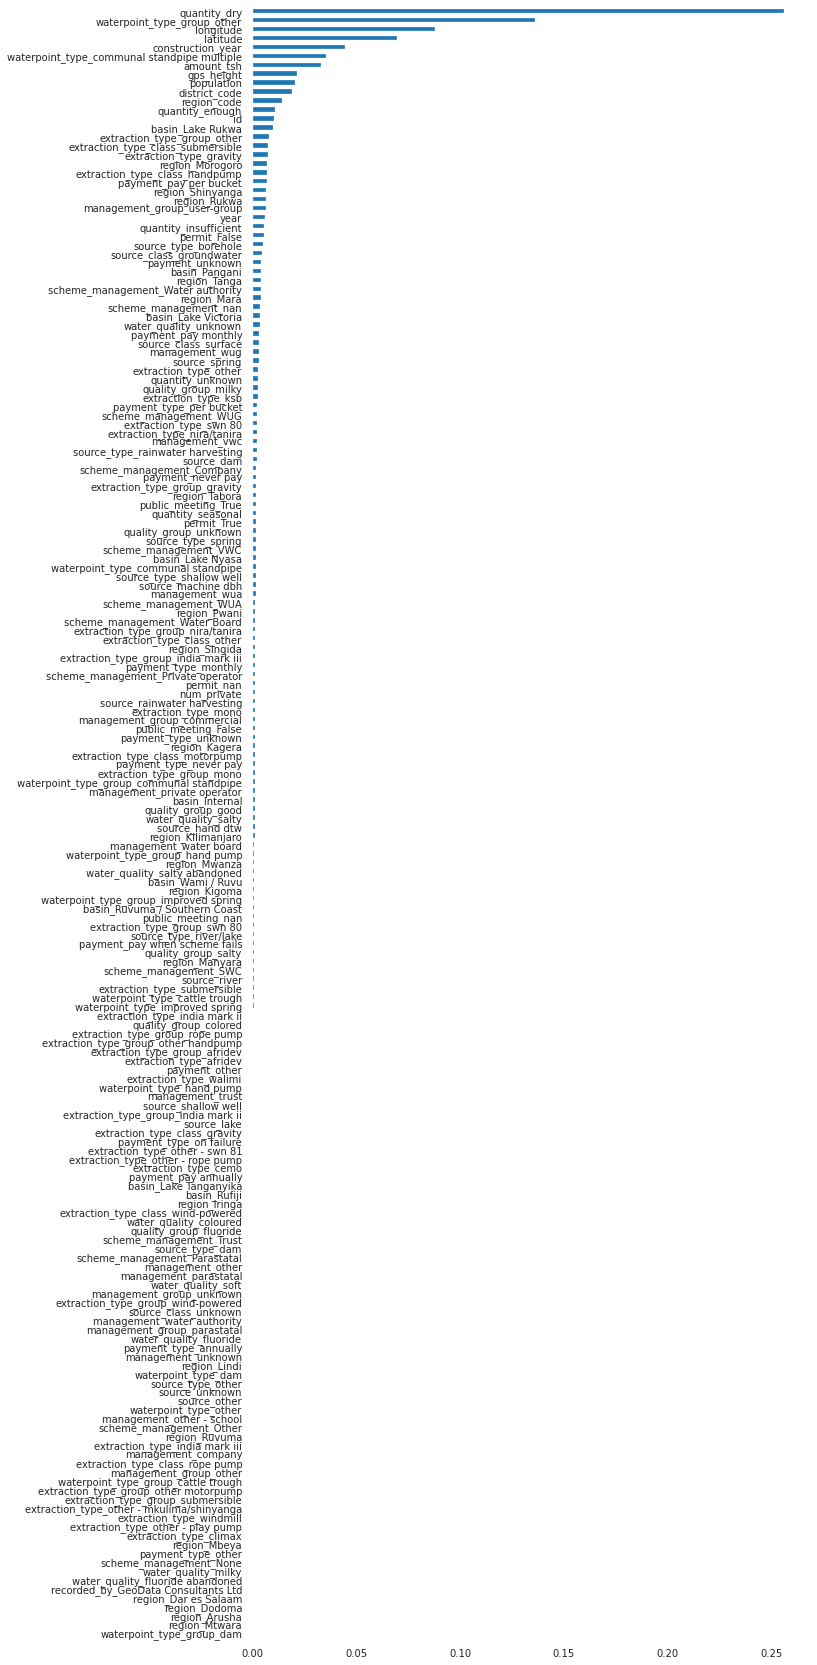

In [0]:
import matplotlib.pyplot as plt
model = pipeline.named_steps['decisiontreeclassifier']

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

importances = pd.Series(model.feature_importances_, encoded_columns)

# Increase size so labels don't overlap
plt.figure(figsize=(10, 30))

# A measure of how early and often this tree was used in the tree
# How many samples were separated?
importances.sort_values().plot.barh();

In [0]:
# # Subset training, validation, test sets by feature importance
# new_cols = importances[importances > 0.01].index
# new_cols
# X_train_subset = X_train[new_cols]
# cols = [col for col in importances.index]


In [0]:
# X_train_subset = X_train[condition]
# y_train_subset = y_train[condition]

# X_val_subset = X_val[condition]
# y_val_subset = y_val[condition]

# X_test_subset = X_test[condition]

*** Further exploration (incomplete) ***

In [0]:
# source type borehole, source type groundwater, source class surface, source spring, 
# source type rainwater harvesting, source dam

# borehole = machine dbh + hand dtw
train['source'].value_counts(dropna=False)

spring                  13644
shallow well            13526
machine dbh              8845
river                    7646
rainwater harvesting     1820
hand dtw                  701
lake                      604
dam                       516
other                     166
unknown                    52
Name: source, dtype: int64

In [0]:
train['source_type'].value_counts(dropna=False)

spring                  13644
shallow well            13526
borehole                 9546
river/lake               8250
rainwater harvesting     1820
dam                       516
other                     218
Name: source_type, dtype: int64

In [0]:
# groundwater = spring + shallow well + borehole
# surface = river/lake + rainwater harvesting + dam
# unknown = other
train['source_class'].value_counts(dropna=False)

groundwater    36716
surface        10586
unknown          218
Name: source_class, dtype: int64

In [0]:
train[(train['status_group'] == 'functional') & (train['source_class'] == 'groundwater')]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year
13541,52777,0.0,2011-08-05,Government Of Tanzania,0,Sengerema Water Department,32.238386,-2.480578,Not Known,0,Lake Victoria,Kibinda,Mwanza,19,5,Sengerema,Kafunzo,0,True,GeoData Consultants Ltd,VWC,None,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,dry,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011
5322,2052,10.0,2013-03-03,Germany Republi,1408,CES,37.178725,-3.222180,Area Two Namba 12,0,Pangani,Tema,Kilimanjaro,3,5,Hai,Masama Mashariki,90,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2013
53479,32570,500.0,2013-10-02,Danida,519,DANIDA,34.638345,-11.030694,Kwa Mzee Lami,0,Lake Nyasa,Loshoto 'A',Ruvuma,10,3,Mbinga,Kihagara,96,True,GeoData Consultants Ltd,VWC,DANIDA,True,1992,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2013
23825,63696,0.0,2011-08-05,Jica,0,DWE,30.707507,-1.061360,Bushega,0,Lake Victoria,Bushega,Kagera,18,1,Karagwe,Murongo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011
25221,3021,500.0,2011-04-15,Rc Church,1846,ACRA,34.802357,-9.128986,Ofisi Ya Kijiji,0,Rufiji,Kati,Iringa,11,4,Njombe,Mdandu,75,True,GeoData Consultants Ltd,WUA,mtwango water supply scheme,True,2009,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,70163,0.0,2013-01-24,Rwssp,0,DWE,32.351910,-3.488952,Kwa Faustin Lutema,0,Lake Tanganyika,Malito Center,Shinyanga,17,3,Kahama,Segese,0,NaN,GeoData Consultants Ltd,NaN,NaN,False,0,swn 80,swn 80,handpump,unknown,unknown,unknown,unknown,unknown,unknown,unknown,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2013
27567,71289,0.0,2013-10-03,Oxfam,1887,DWE,36.711504,-3.322403,Kwa Matayo,0,Pangani,Karatini,Arusha,2,2,Arusha Rural,Oltroto,150,True,GeoData Consultants Ltd,VWC,Nabaiye pipe broken,True,1998,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2013
5854,19070,3000.0,2013-01-23,Wateraid,1532,SEMA,34.793041,-4.208892,Dodoma'B' 2,0,Internal,Dodoma B,Singida,13,1,Iramba,Nkinto,630,True,GeoData Consultants Ltd,VWC,NaN,True,2009,afridev,afridev,handpump,vwc,user-group,pay annually,annually,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2013
20834,19209,20.0,2013-01-15,Dfid,1492,WATER AID,34.727193,-4.711127,Kwa Sima Mahumbi,0,Internal,Mfumbu,Singida,13,4,Singida Urban,Mtipa,58,True,GeoData Consultants Ltd,WUG,NaN,True,2006,nira/tanira,nira/tanira,handpump,wug,user-group,pay per bucket,per bucket,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2013


In [0]:
train['extraction_type_class'].value_counts(dropna=False)

gravity         21455
handpump        13171
other            5144
submersible      4949
motorpump        2366
rope pump         347
wind-powered       88
Name: extraction_type_class, dtype: int64

In [0]:
# gravity is the same
# nira/tanira is a type of handpump
# other is the same
# submersible is the same
# swn 80 is a type of handpump
# mono is motorpump
# india mark ii is a handpump
# afridev is a handpump
# ropepump is the same
# india mark iii is a handpump


train['extraction_type_group'].value_counts(dropna=False)

gravity            21455
nira/tanira         6564
other               5144
submersible         4949
swn 80              2940
mono                2274
india mark ii       1932
afridev             1379
rope pump            347
other handpump       274
other motorpump       92
wind-powered          88
india mark iii        82
Name: extraction_type_group, dtype: int64

In [0]:
train['management'].value_counts(dropna=False)

vwc                 32376
wug                  5262
water board          2352
wua                  2032
private operator     1585
parastatal           1385
water authority       724
other                 686
company               533
unknown               440
other - school         79
trust                  66
Name: management, dtype: int64

In [0]:
# user-group = vwc + wug + ?
# = 37638. 4384 left
# commercial = 
# parastatal = parastatal
# other = other + (other - school)
# unknown = unknown
train['management_group'].value_counts(dropna=False)

user-group    42022
commercial     2908
parastatal     1385
other           765
unknown         440
Name: management_group, dtype: int64

In [0]:
train['status_group'].value_counts(dropna=False)

functional                 25807
non functional             18259
functional needs repair     3454
Name: status_group, dtype: int64

In [0]:
# Create a new column to represent the target as 0 or 1 to help make visualizations between features and target
train['functional'] = (train['status_group']=='functional').astype(int)

In [0]:
train['functional'].value_counts(dropna=False)

1    25807
0    21713
Name: functional, dtype: int64

In [0]:
# mbeya, arusha, tanga, iringa, dar es salaam, kilimanjaro, pwani, kigoma, kagera, rukwa
train['region'].value_counts(normalize=True, dropna=False)

Iringa           0.088742
Shinyanga        0.084933
Mbeya            0.079630
Kilimanjaro      0.073380
Morogoro         0.065993
Kagera           0.056187
Arusha           0.055661
Mwanza           0.052462
Kigoma           0.047306
Ruvuma           0.044487
Pwani            0.043624
Tanga            0.043013
Dodoma           0.037332
Singida          0.035290
Tabora           0.033333
Mara             0.033081
Rukwa            0.030093
Mtwara           0.028767
Manyara          0.026957
Lindi            0.026284
Dar es Salaam    0.013447
Name: region, dtype: float64